In [1]:
import numpy as np
import emcee
import dlsfunctions as dls
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
r = 2.2439608235145855e-09
diameter = r * 2 
sigma = 5e-10

m = 20
c = 1
eta = 1e-3
n = 1.33 
theta = np.pi
k_b = 1.38e-23
t = 298.15
lambda_0 = 638e-9
beta = 1

time_in = np.linspace(1e-4, 1e-1, 200)*0.001
gamma = dls.calc_gamma(eta, n, theta, k_b, t, lambda_0)

d = np.linspace(5e-10, 9e-9, 20)
f_1 = dls.generate_distribution(d, diameter, sigma, c)

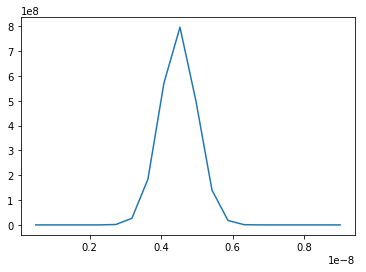

In [3]:
plt.plot(d, f_1)

In [4]:
theta_input = np.append(f_1, beta)

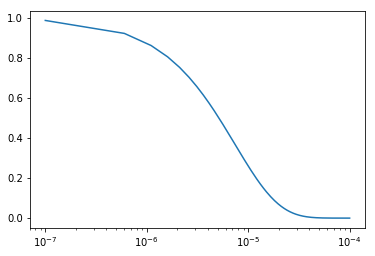

In [5]:
sim_data = dls.g2(theta_input, d, m, gamma, time_in)
plt.semilogx(time_in, sim_data)

In [6]:
ndim = 21
nwalkers = 100
nsteps = 1000

In [7]:
start_pos = [theta_input + np.absolute(1e-04*np.random.randn(ndim)) for i in range(nwalkers)]

In [8]:
sampler = dls.create_sampler(nwalkers, ndim, d, sim_data, m, gamma, time_in)

In [9]:
result = dls.infer(sampler, start_pos, nsteps)
result.acceptance_fraction

array([0.337, 0.345, 0.397, 0.328, 0.347, 0.344, 0.375, 0.378, 0.353,
       0.307, 0.362, 0.382, 0.383, 0.349, 0.373, 0.372, 0.358, 0.363,
       0.332, 0.341, 0.331, 0.368, 0.344, 0.338, 0.343, 0.355, 0.354,
       0.348, 0.358, 0.335, 0.315, 0.365, 0.323, 0.325, 0.338, 0.36 ,
       0.362, 0.365, 0.372, 0.348, 0.345, 0.344, 0.324, 0.331, 0.324,
       0.382, 0.369, 0.371, 0.356, 0.341, 0.334, 0.337, 0.349, 0.345,
       0.373, 0.373, 0.367, 0.359, 0.361, 0.332, 0.327, 0.35 , 0.338,
       0.358, 0.357, 0.322, 0.351, 0.339, 0.366, 0.36 , 0.336, 0.332,
       0.336, 0.338, 0.335, 0.376, 0.392, 0.367, 0.357, 0.351, 0.313,
       0.351, 0.382, 0.359, 0.391, 0.355, 0.337, 0.34 , 0.327, 0.329,
       0.352, 0.354, 0.364, 0.34 , 0.329, 0.322, 0.347, 0.353, 0.371,
       0.36 ])

/usr/local/lib/python2.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


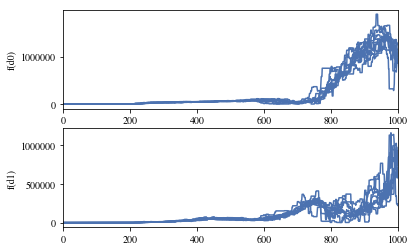

In [10]:
dls.view_burnin_plot(result, 0, 1)

In [ ]:
dls.view_burnin_plot(result, 2, 3)

In [ ]:
dls.view_burnin_plot(result, 4, 5)

In [ ]:
dls.view_burnin_plot(result, 6, 7)

In [ ]:
dls.view_burnin_plot(result, 8, 9)

chained_sampler = dls.chain(result, 4300, ndim)
samples_df = dls.create_dataframe(chained_sampler, ndim)

inferred_f = dls.get_infer_f(samples_df, m)

inferred_f.shape

plt.plot(d, inferred_f)

In [17]:
samples = result.chain[:,800:,:]

# reshape the samples into a 1D array where the colums are the f(d) values
traces = samples.reshape(-1, ndim).T

parameter_samples = pd.DataFrame({'f(d0)': traces[0], 'f(d1)': traces[1], 'f(d2)': traces[2], 'f(d3)': traces[3], 'f(d4)': traces[4], 'f(d5)': traces[5], 'f(d6)': traces[6], 'f(d7)': traces[7], 'f(d8)': traces[8], 'f(d9)': traces[9], 'f(d10)': traces[10], 'f(d11)': traces[11], 'f(d12)': traces[12], 'f(d13)': traces[13], 'f(d14)': traces[14], 'f(d15)': traces[15], 'f(d16)': traces[16], 'f(d17)': traces[17], 'f(d18)': traces[18], 'f(d19)': traces[19]})

# calculate the MAP and values using pandas
q = parameter_samples.quantile([0.16,0.50,0.84], axis=0)

In [18]:
q = parameter_samples.quantile([0.5], axis=0)
q

,f(d0),f(d1),f(d10),f(d11),f(d12),f(d13),f(d14),f(d15),f(d16),f(d17),f(d18),f(d19),f(d2),f(d3),f(d4),f(d5),f(d6),f(d7),f(d8),f(d9)
0.5,1.068749e+06,207086.517037,4.977765e+08,1.380492e+08,1.759827e+07,1.027014e+06,810183.449137,41986.162383,61161.707048,59888.657496,168807.819009,545028.664026,653535.132241,471993.853791,105108.279637,4.732124e+06,2.675676e+07,1.854236e+08,5.682623e+08,7.958905e+08


In [15]:
infer_f = np.zeros(20)
infer_f[0] = 1.0687e6
infer_f[1] = 207086.5
infer_f[2] = 653535.132241
infer_f[3] = 471993.853791
infer_f[4] = 105108.279637
infer_f[5] = 4.732124e+06
infer_f[6] = 2.675676e+07
infer_f[7] = 1.854236e+08
infer_f[8] = 5.682623e+08
infer_f[9] = 7.958905e+08
infer_f[10] = 4.977765e+08
infer_f[11] = 1.380492e+08
infer_f[12] = 1.759827e+07
infer_f[13] = 1.027014e+06
infer_f[14] = 810183.449137
infer_f[15] = 41986.162383
infer_f[16] = 61161.707048
infer_f[17] = 59888.657496
infer_f[18] = 168807.819009
infer_f[19] = 545028.664026

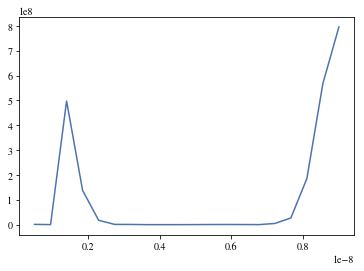

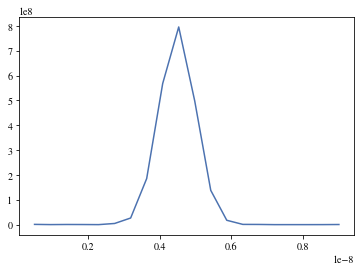

In [16]:
plt.plot(d, infer_f)

In [22]:
q_50 = parameter_samples.quantile([0.5], axis=0)
array1 = q_50.values
array1

array([[1.06874936e+06, 2.07086517e+05, 4.97776538e+08, 1.38049198e+08,
        1.75982666e+07, 1.02701394e+06, 8.10183449e+05, 4.19861624e+04,
        6.11617070e+04, 5.98886575e+04, 1.68807819e+05, 5.45028664e+05,
        6.53535132e+05, 4.71993854e+05, 1.05108280e+05, 4.73212410e+06,
        2.67567555e+07, 1.85423569e+08, 5.68262269e+08, 7.95890491e+08]])

In [21]:
infer_f1

array([1.06874936e+06, 2.07086517e+05, 4.97776538e+08, 1.38049198e+08,
       1.75982666e+07, 1.02701394e+06, 8.10183449e+05, 4.19861624e+04,
       6.11617070e+04, 5.98886575e+04, 1.68807819e+05, 5.45028664e+05,
       6.53535132e+05, 4.71993854e+05, 1.05108280e+05, 4.73212410e+06,
       2.67567555e+07, 1.85423569e+08, 5.68262269e+08, 7.95890491e+08])